# 1. Data Preprocessing

# (1) Reading the Training, the Development and the Testing Datasets 

In [1]:
import pandas as pd
from os import listdir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory1 = 'data/train'
paths1 = listdir(directory1)
paths1.sort()
paths1

['anger-ratings-0to1.train.txt',
 'fear-ratings-0to1.train.txt',
 'joy-ratings-0to1.train.txt',
 'sadness-ratings-0to1.train.txt']

In [3]:
emotion = paths1[1].split("-")[0]
emotion

'fear'

In [4]:
train = pd.read_csv('%s/%s' %(directory1,paths1[1]), delimiter='\t',header=None)
train.head()

,0,1,2,3
0,20000,I feel like I am drowning. #depression #anxiet...,fear,0.979
1,20001,I get so nervous even thinking about talking t...,fear,0.979
2,20002,I lost my blinders .... #panic,fear,0.975
3,20003,I feel like I am drowning. #depression #falur...,fear,0.938
4,20004,This is the scariest American Horror Story out...,fear,0.938


In [5]:
train.columns = ['SentID', 'Tweet', 'Emotion', 'Rating']
train[:10]

,SentID,Tweet,Emotion,Rating
0,20000,I feel like I am drowning. #depression #anxiet...,fear,0.979
1,20001,I get so nervous even thinking about talking t...,fear,0.979
2,20002,I lost my blinders .... #panic,fear,0.975
3,20003,I feel like I am drowning. #depression #falur...,fear,0.938
4,20004,This is the scariest American Horror Story out...,fear,0.938
5,20005,@mgcsartwork I nearly started crying and havin...,fear,0.938
6,20006,I have to finally tell my therapist about my s...,fear,0.938
7,20007,@laura221b I don't think I've ever moved so fa...,fear,0.938
8,20008,My bus was in a car crash... I'm still shaking...,fear,0.938
9,20009,My bus was in a car crash... I'm still shaking...,fear,0.920


In [6]:
# check if there are any duplicates(subset = all of the columns)

assert train.duplicated().sum() == 0


In [7]:
# checking missing data & len(train),len(test)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   1147 non-null   int64  
 1   Tweet    1147 non-null   object 
 2   Emotion  1147 non-null   object 
 3   Rating   1147 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.0+ KB
None


In [8]:
print(train.describe())

             SentID       Rating
count   1147.000000  1147.000000
mean   20573.000000     0.495579
std      331.254686     0.194792
min    20000.000000     0.062000
25%    20286.500000     0.354000
50%    20573.000000     0.479000
75%    20859.500000     0.625000
max    21146.000000     0.979000


In [9]:
directory2 = 'data/dev'
paths2 = listdir(directory2)
paths2.sort()
paths2

['anger-ratings-0to1.dev.gold.txt',
 'fear-ratings-0to1.dev.gold.txt',
 'joy-ratings-0to1.dev.gold.txt',
 'sadness-ratings-0to1.dev.gold.txt']

In [10]:
dev = pd.read_csv('%s/%s' %(directory2,paths2[1]), delimiter='\t',header=None)
dev.columns = train.columns
dev[:10]

,SentID,Tweet,Emotion,Rating
0,21147,I know this is going to be one of those nights...,fear,0.771
1,21148,This is #horrible: Lewis Dunk has begun networ...,fear,0.479
2,21149,"@JeffersonLake speaking of ex cobblers, saw Ri...",fear,0.417
3,21150,@1johndes ball watching &amp; Rojo'd header wa...,fear,0.475
4,21151,"Really.....#Jumanji 2....w/ The Rock, Jack Bla...",fear,0.542
5,21152,"Really.....#Jumanji 2....w/ The Rock, Jack Bla...",fear,0.542
6,21153,Losing to Villa...'@M0tivati0nQuote: Most of t...,fear,0.311
7,21154,Are you worrying/worried?\n1Peter 5:7\nThrow a...,fear,0.438
8,21155,If my concerns &amp; anxiety don't matter to y...,fear,0.729
9,21156,There goes the butterflies in my stomach. #ner...,fear,0.812


In [11]:
# check if there are any duplicates(subset = all of the columns)

assert dev.duplicated().sum() == 0


In [12]:
# checking missing data & len(train),len(test)
print(dev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
None


In [13]:
print(dev.describe())

             SentID      Rating
count    110.000000  110.000000
mean   21201.500000    0.489309
std       31.898276    0.185675
min    21147.000000    0.060000
25%    21174.250000    0.354000
50%    21201.500000    0.466500
75%    21228.750000    0.632500
max    21256.000000    0.896000


In [14]:
directory3 = 'data/test'
paths3 = listdir(directory3)
paths3.sort()
paths3

['anger-ratings-0to1.test.gold.txt',
 'fear-ratings-0to1.test.gold.txt',
 'joy-ratings-0to1.test.gold.txt',
 'sadness-ratings-0to1.test.gold.txt']

In [15]:
test = pd.read_csv('%s/%s' %(directory3,paths3[1]), delimiter='\t',header=None)
test.columns = train.columns

test[:10]

,SentID,Tweet,Emotion,Rating
0,21257,#Matthew 25; 1-13\nCould somebody shoot a #vid...,fear,0.417
1,21258,@bkero @whispersystems Which really sucks beca...,fear,0.438
2,21259,Be #afraid of the #quiet ones they are the one...,fear,0.542
3,21260,@riinkanei he's a horrible person and now i ga...,fear,0.583
4,21261,What we fear doing most is usually what we mos...,fear,0.292
5,21262,What we fear doing most is usually what we mos...,fear,0.188
6,21263,a pedicure is supposed to be nice but honestly...,fear,0.604
7,21264,US you need to band together not apart #nevert...,fear,0.729
8,21265,US you need to band together not apart #nevert...,fear,0.625
9,21266,"What a shamefull, unequal, dangerous and worry...",fear,0.825


In [16]:
# check if there are any duplicates(subset = all of the columns)

assert test.duplicated().sum() == 0


In [17]:
# checking missing data & len(train),len(test)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   995 non-null    int64  
 1   Tweet    995 non-null    object 
 2   Emotion  995 non-null    object 
 3   Rating   995 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.2+ KB
None


In [18]:
print(test.describe())

            SentID     Rating
count    995.00000  995.00000
mean   21754.00000    0.50247
std      287.37606    0.20094
min    21257.00000    0.06200
25%    21505.50000    0.35400
50%    21754.00000    0.50000
75%    22002.50000    0.64600
max    22251.00000    1.00000


In [19]:
# plan to train models on the combined training and development sets
train = pd.concat([train, dev],axis=0,ignore_index=True)
train

,SentID,Tweet,Emotion,Rating
0,20000,I feel like I am drowning. #depression #anxiet...,fear,0.979
1,20001,I get so nervous even thinking about talking t...,fear,0.979
2,20002,I lost my blinders .... #panic,fear,0.975
3,20003,I feel like I am drowning. #depression #falur...,fear,0.938
4,20004,This is the scariest American Horror Story out...,fear,0.938
...,...,...,...,...
1252,21252,Staff on @ryainair FR1005. Asked for info and ...,fear,0.312
1253,21253,Staff on @ryainair FR1005. Asked for info and ...,fear,0.271
1254,21254,An adviser to the #European #Union’s top #cour...,fear,0.500
1255,21255,So about 18mths ago i signed up to @Lumo_Energ...,fear,0.479


# (2) Define Text Data Cleaning Process

In [20]:
import string
import re

from nltk.corpus import stopwords
from nltk import bigrams

import wordsegment as ws # $ pip install wordsegment    
ws.load()     

import emoji  # $ pip install emoji

# As the glove model contains many words made with grammatical role, tense ,or derivational morphology,
# we do not need WordNetLemmatizer or SnowballStemmer here.

In [21]:
def normalize_text(text):
    
    # replace emoji to word
    # text = emoji.demojize(text)
    
    # remove characters outside the ascii code 128
    # text = ''.join([w if ord(w)<128 else ' ' for w in text])
    
    # replace '--' with a space
    text = text.replace('--',' ')
    
    # remove any newline characters
    text = text.replace('\n',' ')
    
    # tweets mentions user using '@' followed by username. Replace all those with <user> to be usable for Glove
    text = re.sub('@[^ ]+','<user>',text)
    
    # Replace all URLs with <url> to be usable for Glove
    text = re.sub(r'\d+','<number>',text)
   
    # Replace all numbers with <number> to be usable for Glove
    text = re.sub(r'http\S+','<url>',text)
    
    # turn some abbreviations into a whold word
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"fu\*k", " fuck", text)
    text = re.sub(r"f\*c+", "fuck", text)
    text = text.replace("wtf", "what the fuck")
    
    # prepare spaces between punctuation and words
    text1 = text.split('...')
    for i in range(len(text1)):
        text1[i] = text1[i].replace('/',' / ').replace('\\',' \ ').replace(',',' , ').replace('.',' . ').replace('?',' ? ').replace('!',' ! ').replace("'"," ' ").replace(':',' : ').replace(';',' ; ').replace('-',' - ').replace('(',' ( ').replace(')',' ) ').replace('[',' [ ').replace(']',' ] ').replace('&',' & ').replace('*',' * ').replace('{',' { ').replace('}',' } ').replace('-',' - ').replace('`',' ` ').replace('"',' " ').replace('>','> ').replace('<',' <')
    text1 = ' '.join(text1)
    
    # split into tokens by white space
    tokens = text1.split()
    
    return tokens

def clean_text(text):
   
    tokens = normalize_text(text)
    
    new_tokens1 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        elif w in emoji.UNICODE_EMOJI:
            w = w
        else:
            # prepare regex for char filtering: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
            re_punc = re.compile('[%s]' %re.escape(string.punctuation))
            # remove punctuation from each word
            w = re_punc.sub('', w)
    
            # remove remaining tokens that are not alphabetic
            if w.isalpha():
                w = w
        new_tokens1.append(w) 
        
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in new_tokens1 if not w in stop_words]
    
    new_tokens2 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        elif w in emoji.UNICODE_EMOJI:
            w = w
        else:
            # word segment will convert the hashtag based joined words, for example, it will segment #iamthebest to ['i','am','the','best']
            w = ' '.join(ws.segment(w)) 
        new_tokens2.append(w)
        
    
    # make lower case
    tokens = [word.lower() for word in new_tokens2]
    
    
    clean_text = ' '.join(tokens)
    tokens = clean_text.split()
    
    new_tokens3 = []   
    # filter out short tokens
    for w in tokens:
        if w in emoji.UNICODE_EMOJI:
            w = w
        else:
            if len(w) > 1:
                w =w
        new_tokens3.append(w)
    
    return ' '.join(new_tokens3)

In [22]:
# do a sanity check
text = "@laura221b I've left it for my dad to deal with 😂 My work is done as soon as it's felt the wrath of my slipper 😷"
clean_text(text)

'<user> i left dad deal 😂 my work done soon felt wrath slipper 😷'

In [23]:
# prepare for clean Hashtag Emotion Intensity Lexicons...

def remove_stopwords(string):
    split_string = \
        [word for word in string.split()
         if word not in stopwords.words('english')]
    
    return " ".join(split_string)

def clean_str(string):  
    string = string.replace("\\n", " ")
    string = string.replace("_NEG", "")
    string = string.replace("_NEGFIRST", "")
    string = re.sub(r"@[A-Za-z0-9_s(),!?\'\`]+", "", string) # removing any twitter handle mentions

    string = re.sub(r"#", "", string)
    string = re.sub(r"\*", "", string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " !", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " ?", string)
    string = re.sub(r"\s{2,}", " ", string)

    return remove_stopwords(string.strip().lower())

# (3) Clean Text Data

In [24]:
train['Tweet'] = train['Tweet'].apply(clean_text)

test['Tweet'] = test['Tweet'].apply(clean_text)

In [25]:
# do a sanity check
train[0:55]

,SentID,Tweet,Emotion,Rating
0,20000,i feel like i drowning depression anxiety fa l...,fear,0.979
1,20001,i get nervous even thinking talking i wanna die,fear,0.979
2,20002,i lost blinders panic,fear,0.975
3,20003,i feel like i drowning depression fa lure wort...,fear,0.938
4,20004,this scariest american horror story i gonna wa...,fear,0.938
5,20005,<user> i nearly started crying full panic atta...,fear,0.938
6,20006,i finally tell therapist sexuality last fronti...,fear,0.938
7,20007,<user> i think i ever moved fast panic life 😂 ...,fear,0.938
8,20008,my bus car crash i still shaking bit this week...,fear,0.938
9,20009,my bus car crash i still shaking bit this week...,fear,0.920


In [26]:
# do a sanity check
train[0:10]

,SentID,Tweet,Emotion,Rating
0,20000,i feel like i drowning depression anxiety fa l...,fear,0.979
1,20001,i get nervous even thinking talking i wanna die,fear,0.979
2,20002,i lost blinders panic,fear,0.975
3,20003,i feel like i drowning depression fa lure wort...,fear,0.938
4,20004,this scariest american horror story i gonna wa...,fear,0.938
5,20005,<user> i nearly started crying full panic atta...,fear,0.938
6,20006,i finally tell therapist sexuality last fronti...,fear,0.938
7,20007,<user> i think i ever moved fast panic life 😂 ...,fear,0.938
8,20008,my bus car crash i still shaking bit this week...,fear,0.938
9,20009,my bus car crash i still shaking bit this week...,fear,0.920


In [27]:
# show the distribution of text length (from below: there is no need to truncate any of texts)
def show_text_len(train):
    train["text_len"] = train['Tweet'].map(lambda x: len(x.split()))
    return train["text_len"]

In [28]:
show_text_len(train).describe()

count    1257.000000
mean       11.422434
std         4.583504
min         2.000000
25%         8.000000
50%        12.000000
75%        15.000000
max        27.000000
Name: text_len, dtype: float64

In [29]:
show_text_len(test).describe()

count    995.000000
mean      11.202010
std        4.669176
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       26.000000
Name: text_len, dtype: float64

There is not any reviews' length = 0 after text cleaning

In [30]:
train_tweets = list(train['Tweet'])
train_intensities = list(train['Rating'])

In [31]:
# check
train_tweets[:100]

['i feel like i drowning depression anxiety fa lure worthless',
 'i get nervous even thinking talking i wanna die',
 'i lost blinders panic',
 'i feel like i drowning depression fa lure worthless',
 'this scariest american horror story i gonna watch daytime frightened',
 '<user> i nearly started crying full panic attack tatin of bc crowds i feel',
 'i finally tell therapist sexuality last frontier sure i am fear single girl problems',
 '<user> i think i ever moved fast panic life 😂 gave fright 😓',
 'my bus car crash i still shaking bit this week absolute horror icing cake terrible',
 'my bus car crash i still shaking bit this week absolute horror icing cake',
 'proc ra sting fun im hour away time due still havent finished panic attack',
 'my anxiety rising tonight i sure sometimes i wonder i magnet free floating anxiety universe',
 'im nervous wreck im nervous pile up going crazy help me insane antisocial',
 'panic panic attack fear starting new medication',
 'job interview afternoon n

In [32]:
# check
train_intensities[:10]

[0.9790000000000001,
 0.9790000000000001,
 0.975,
 0.938,
 0.938,
 0.938,
 0.938,
 0.938,
 0.938,
 0.92]

In [33]:
test_tweets = list(test['Tweet'])
test_intensities = list(test['Rating'])

In [34]:
# show Max Text Length of All Datasets for comparsion

all_tweets_max_len = pd.DataFrame(np.array([max(show_text_len(train)), max(show_text_len(test))]))

all_tweets_max_len.index = ['train', 'test']
all_tweets_max_len.columns = ['max text length']

all_tweets_max_len

,max text length
train,27
test,26


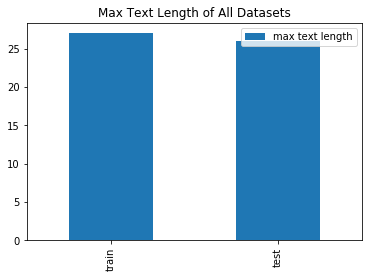

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
all_tweets_max_len.plot(kind='bar')
plt.title('Max Text Length of All Datasets')
plt.show()

In [36]:
'''
we set the length to which each tweet vector will be zero padded to.
this is based on the maximum length we got on the training set - we do not want to remove
any words as the maximun length of the training set is not very big.
'''

max_len = max(show_text_len(train))
max_len

27

# 2. Text Data Preparation（Feature Extraction)

# (1) Load Pre-trained Word Vectors

In [37]:
import numpy as np
import gensim
from nltk import word_tokenize

In [38]:
word_vector_path = "files/wv_models/"

# 1) Glove

In [39]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'UTF-8')
    model = {}
    num = 1
    for line in f:
        try:
            splitLine = line.split()
            word = splitLine[0]
            coefs = np.asarray(splitLine[1:], dtype = 'float32')
            model[word] = coefs
            num += 1
        except Exception as e:
            print("Failed at line " + str(num))
    print("Done. Found %s word vectors." %len(model)," words loaded!")
    return model

In [40]:
# To download the pretrained glove model (2B tweets, 27B tokens) - [https://nlp.stanford.edu/projects/glove/   glove.twitter.27B.zip]
# choose glove.twitter.27B.200d.txt from glove.twitter.27B.zip. [200-dimension vectors]

wv_model_path1 = word_vector_path + "glove.twitter.27B.200d.txt"
 
wv_model_g = loadGloveModel(wv_model_path1)


Loading Glove Model
Done. Found 1193514 word vectors.  words loaded!


# 2) Word2Vec

In [41]:
# To download the pretrained word2vec model  - [https://github.com/FredericGodin/TwitterEmbeddings]

wv_model_path2 = word_vector_path + "word2vec_twitter_tokens.bin"
wv_model_w = gensim.models.KeyedVectors.load_word2vec_format(wv_model_path2, binary=True, unicode_errors='ignore')

In [42]:
words = list(wv_model_w.wv.vocab)
print('Word Vectors: %d' % len(words))

Word Vectors: 3039345


C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


# 3) Define Averaged Word Embeddings

In [43]:
w2v_dimensions_g = len(wv_model_g['word'])
w2v_dimensions_w = len(wv_model_w['word'])

In [44]:
print(w2v_dimensions_g,w2v_dimensions_w)

200 400


In [45]:
def get_averaged_embeddings(tweet, model, dimensions):
    tokens = word_tokenize(tweet)
    vector_list = []
    for token in tokens:
        try:
            vector_list.append(model[token])
        except Exception as e:
            pass
    if len(vector_list) == 0:
        uni_vec_rep = np.zeros(dimensions).tolist()
    else:
        uni_vec_rep = sum(vector_list) / float(len(vector_list))
    return uni_vec_rep

# (2) Load Lexicon Feature Vectors

In [46]:
import json
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

lexicons_path = "files/lexicons/"

In [47]:
paths2 = listdir(lexicons_path)
paths2.sort()
paths2

['0.Emoji_Vectors',
 '1.NRC-Emotion-Intensity-Lexicon',
 '3.NRC-Emotion-Lexicon',
 '4.NRC-Hashtag-Emotion-Lexicon',
 '5.NRC-Emoticon-Lexicon',
 '6.NRC-Emoticon-AffLexNegLex',
 '7.NRC-Hashtag-Sentiment-AffLexNegLex',
 '8.NRC-Hashtag-Sentiment-Lexicon',
 '9.DepecheMood_V1.0']

# 1) Emoji Vectors

In [48]:
with open(('%s%s/' %(lexicons_path, paths2[0])) + listdir('%s%s/' %(lexicons_path, paths2[0]))[0], encoding = 'UTF-8') \
as emoji_file:
    emoji_list = json.load(emoji_file)
    
emoji_dict = dict()
for emoji in emoji_list:
    emoji_dict[emoji["emoji"]] = (emoji["name"], emoji["polarity"])

In [49]:
# do a sanity check
print(emoji_dict["😂"])

('joy', 3)


In [50]:
poly_emoji_intensity = PolynomialFeatures(5)

def get_emoji_intensity(tweet):
    score = 0.0
    for emoji in emoji_dict.keys():
        count = tweet.count(emoji)
        score += count * emoji_dict[emoji][1]
        
    return normalize(poly_emoji_intensity.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]

In [51]:
# do a sanity check
get_emoji_intensity("😂")

array([0.00387988, 0.01163963, 0.03491889, 0.10475666, 0.31426998,
       0.94280993])

# 2) Emotion Intensity Lexicon

In [52]:
affect_intensity_file_path = ('%s%s/' %(lexicons_path, paths2[1])) + listdir('%s%s/' %(lexicons_path, paths2[1]))[0]

def get_word_affect_intensity_dict(emotion):
    word_intensities = dict()

    with open(affect_intensity_file_path) as affect_intensity_file:
        for line in affect_intensity_file:
            word_int_array = line.replace("\n", "").split("\t")

            if (word_int_array[1] == emotion):
                word_intensities[word_int_array[0]] = float(word_int_array[2])

    return word_intensities

In [53]:
word_intensities = get_word_affect_intensity_dict(emotion)
word_intensities

{'torture': 0.984,
 'terrorist': 0.972,
 'terrorism': 0.969,
 'terrorists': 0.969,
 'horrific': 0.969,
 'suicidebombing': 0.967,
 'kill': 0.962,
 'homicidal': 0.959,
 'catastrophe': 0.953,
 'murderer': 0.953,
 'annihilate': 0.953,
 'terror': 0.953,
 'dying': 0.948,
 'war': 0.942,
 'bombing': 0.938,
 'bomb': 0.935,
 'missiles': 0.934,
 'horror': 0.923,
 'horrified': 0.922,
 'brutality': 0.922,
 'bloodthirsty': 0.922,
 'terrorize': 0.922,
 'murderous': 0.92,
 'massacre': 0.911,
 'terrifying': 0.906,
 'murder': 0.906,
 'fatality': 0.906,
 'horrifying': 0.906,
 'mutilation': 0.906,
 'horrors': 0.906,
 'killing': 0.906,
 'devastation': 0.906,
 'assassinate': 0.906,
 'holocaust': 0.906,
 'demon': 0.906,
 'terrified': 0.906,
 'suicidal': 0.898,
 'assault': 0.891,
 'crucifixion': 0.891,
 'slaughter': 0.891,
 'kidnap': 0.891,
 'doomed': 0.888,
 'poisoned': 0.886,
 'suicide': 0.879,
 'explosion': 0.879,
 'deadly': 0.875,
 'disaster': 0.875,
 'annihilation': 0.875,
 'dismemberment': 0.875,
 'thre

In [54]:
poly_emo_int = PolynomialFeatures(10)

def get_emo_int_vector(tweet):
    score = 0.0
    for word in word_intensities.keys():
        if word in tweet:
            score += tweet.count(word) * float(word_intensities[word])
    return normalize(poly_emo_int.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]
    # return [score]

In [55]:
get_emo_int_vector("furious")

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 3) SentiWordNet

In [56]:
from nltk.corpus import sentiwordnet as swn

In [57]:
poly_sentiwordnet = PolynomialFeatures(5)

def get_sentiwordnetscore(tweet):
    
    score = np.zeros(2)
    
    for word in tweet.split():
        synsetlist = list(swn.senti_synsets(word))
        
        if synsetlist:
            score[0] += synsetlist[0].pos_score()
            score[1] += synsetlist[0].neg_score()
            
#     return tweet_score.tolist()
    return normalize(poly_sentiwordnet.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]

In [58]:
get_sentiwordnetscore("furious")

array([9.37500185e-01, 2.34375046e-01, 2.34375046e-01, 5.85937616e-02,
       5.85937616e-02, 5.85937616e-02, 1.46484404e-02, 1.46484404e-02,
       1.46484404e-02, 1.46484404e-02, 3.66211010e-03, 3.66211010e-03,
       3.66211010e-03, 3.66211010e-03, 3.66211010e-03, 9.15527525e-04,
       9.15527525e-04, 9.15527525e-04, 9.15527525e-04, 9.15527525e-04,
       9.15527525e-04])

# 4) Sentiment Emotion Presence Lexicon

In [59]:
sentiment_emotion_lex_file_path = ('%s%s/' %(lexicons_path, paths2[2])) + listdir('%s%s/' %(lexicons_path, paths2[2]))[0]

def get_affect_presence_list(emotion):
    word_list = list()
    
    with open(sentiment_emotion_lex_file_path) as sentiment_emotion_lex_file:
        lines = sentiment_emotion_lex_file.readlines()[1:] 
        for line in lines:
            word_array = line.replace("\n", "").split("\t")

            if (word_array[1] == emotion and word_array[2] == '1'):
                word_list.append(word_array[0])
                
    return word_list

In [60]:
word_list = get_affect_presence_list(emotion)
word_list

['abandon',
 'abandoned',
 'abandonment',
 'abduction',
 'abhor',
 'abhorrent',
 'abominable',
 'abomination',
 'abortion',
 'absence',
 'abuse',
 'abyss',
 'accident',
 'accidental',
 'accursed',
 'accused',
 'accuser',
 'accusing',
 'acrobat',
 'adder',
 'adjudicate',
 'admonition',
 'adrift',
 'advance',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'affront',
 'afraid',
 'aftermath',
 'aga',
 'aggression',
 'aggressive',
 'aggressor',
 'aghast',
 'agonizing',
 'agony',
 'ailing',
 'alarm',
 'alarming',
 'alcoholism',
 'alertness',
 'alerts',
 'alien',
 'alienation',
 'ambulance',
 'ambush',
 'anaconda',
 'anarchism',
 'anarchist',
 'anarchy',
 'anathema',
 'angina',
 'anguish',
 'animosity',
 'annihilate',
 'annihilated',
 'annihilation',
 'anomaly',
 'anthrax',
 'antichrist',
 'antisocial',
 'anxiety',
 'anxious',
 'apache',
 'appalling',
 'apparition',
 'appendicitis',
 'apprehend',
 'apprehension',
 'apprehensive',
 'armament',
 'armaments',
 'armed',
 'armor',
 'armored

In [61]:
def get_sentiment_emotion_feature(tweet):
    
    vector = np.zeros(1)
    for word in word_list:
        if word in tweet.split():
            vector[0] = 1.0
    
    return vector

In [62]:
get_sentiment_emotion_feature("furious")

array([0.])

# 5) Hashtag Emotion Intensity

In [63]:
hashtag_emotion_lex_file_path = ('%s%s/' %(lexicons_path, paths2[3])) + listdir('%s%s/' %(lexicons_path, paths2[3]))[0]
    
def get_hashtag_emotion_intensity(emotion):
    hastag_intensities = dict()
    
    with open(hashtag_emotion_lex_file_path) as hashtag_emotion_lex_file:
        for line in hashtag_emotion_lex_file:
            word_array = line.replace("\n", "").split("\t")
            
            if (word_array[0] == emotion):
                hastag_intensities[clean_str(word_array[1])] = float(word_array[2])

    return hastag_intensities

In [64]:
hashtag_emotion_intensities = get_hashtag_emotion_intensity(emotion)

In [65]:
poly_hashtag_emotion = PolynomialFeatures(10)

def get_hashtag_emotion_vector(tweet):
    score = 0.0
    for word in hashtag_emotion_intensities.keys():
        if word in tweet:
            score += tweet.count(word) * float(hashtag_emotion_intensities[word])
            
#     return [score]
    return normalize(poly_hashtag_emotion.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]

In [66]:
get_hashtag_emotion_vector("furious")

array([0.0290405 , 0.03983464, 0.05464087, 0.07495048, 0.10280902,
       0.14102238, 0.19343935, 0.26533932, 0.36396398, 0.4992467 ,
       0.68481301])

# 6) Emoticon Sentiment Lexicon¶

In [67]:
listdir('%s%s/' %(lexicons_path, paths2[4]))

['bigrams-pmilexicon.txt', 'pairs-pmilexicon.txt', 'unigrams-pmilexicon.txt']

In [68]:
emoticon_lexicon_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[2]
emoticon_lexicon_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[0]
emoticon_lexicon_pairs_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[1]
pair_split_string = "---"
    
def get_emoticon_lexicon_unigram_dict():
    emoticon_lexicon_unigrams = dict()
    with open(emoticon_lexicon_unigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_lexicon_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_lexicon_unigrams

def get_emoticon_lexicon_bigram_dict():
    emoticon_lexicon_bigrams = dict()
    with open(emoticon_lexicon_bigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_lexicon_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_lexicon_bigrams

def get_emoticon_lexicon_pairs_dict():
    emoticon_lexicon_pairs = dict()
    with open(emoticon_lexicon_pairs_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            pair = word_array[0].split(pair_split_string)
            token_1 = clean_str(pair[0])
            token_2 = clean_str(pair[1])
            if token_1 and token_2:
                token_1_dict = None
                if token_1 in emoticon_lexicon_pairs.keys():
                    token_1_dict = emoticon_lexicon_pairs[token_1]
                else:
                    token_1_dict = dict()
                    
                token_1_dict[token_2] = np.array([float(val) for val in word_array[1:]])
                emoticon_lexicon_pairs[token_1] = token_1_dict
    
    return emoticon_lexicon_pairs

In [69]:
emoticon_lexicon_unigram_dict = get_emoticon_lexicon_unigram_dict()

In [70]:
emoticon_lexicon_bigram_dict = get_emoticon_lexicon_bigram_dict()

In [71]:
emoticon_lexicon_pairs_dict = get_emoticon_lexicon_pairs_dict()

In [72]:
poly_emoticon_lexicon = PolynomialFeatures(5)

def get_unigram_sentiment_emoticon_lexicon_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    for token in tokens:
        word = clean_str(token)
        if word in emoticon_lexicon_unigram_dict.keys():
            vector_list += emoticon_lexicon_unigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoticon_lexicon.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]


def get_bigram_sentiment_emoticon_lexicon_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in emoticon_lexicon_bigram_dict.keys():
            vector_list += emoticon_lexicon_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoji_intensity.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0].tolist()

def get_pair_sentiment_emoticon_lexicon_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    
    for i in range(len(tokens)):
        word_1 = clean_str(tokens[i])
        if word_1 in emoticon_lexicon_pairs_dict.keys():
            token_1_dict = emoticon_lexicon_pairs_dict[word_1]
            for j in range(i, len(tokens)):
                word_2 = clean_str(tokens[j])
                if word_2 in token_1_dict.keys():
                    vector_list += token_1_dict[word_2]
                    counter += 1
                    
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoji_intensity.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0].tolist()

def get_sentiment_emoticon_lexicon_vector(tweet):
    
    tokens = word_tokenize(tweet)
    final_list = np.asarray([])
    
    # Adding unigram features
    final_list = np.append(
        final_list,
        get_unigram_sentiment_emoticon_lexicon_vector(tokens)
    )
    
    final_list = np.append(
        final_list,
        get_bigram_sentiment_emoticon_lexicon_vector(tokens)
    )
    
    final_list = np.append(
        final_list,
        get_pair_sentiment_emoticon_lexicon_vector(tokens)
    )
   
    return final_list

In [73]:
get_sentiment_emoticon_lexicon_vector("furious")

array([5.21931637e-10, 1.32048704e-10, 3.39255564e-08, 2.76623768e-08,
       3.34083222e-11, 8.58316578e-09, 6.99858133e-09, 2.20516117e-06,
       1.79805449e-06, 1.46610597e-06, 8.45230551e-12, 2.17154094e-09,
       1.77064108e-09, 5.57905775e-07, 4.54907786e-07, 3.70924810e-07,
       1.43335476e-04, 1.16873542e-04, 9.52968880e-05, 7.77036164e-05,
       2.13843329e-12, 5.49399858e-10, 4.47972192e-10, 1.41150161e-07,
       1.15091670e-07, 9.38439770e-08, 3.62638754e-05, 2.95690061e-05,
       2.41101127e-05, 1.96590149e-05, 9.31680593e-03, 7.59678022e-03,
       6.19429772e-03, 5.05073506e-03, 4.11829167e-03, 5.41023623e-13,
       1.38998164e-10, 1.13336965e-10, 3.57109908e-08, 2.91181925e-08,
       2.37425262e-08, 9.17476048e-06, 7.48095854e-06, 6.09985850e-06,
       4.97373078e-06, 2.35715190e-03, 1.92198540e-03, 1.56715732e-03,
       1.27783597e-03, 1.04192779e-03, 6.05592386e-01, 4.93790715e-01,
       4.02629352e-01, 3.28297779e-01, 2.67688958e-01, 2.18269458e-01,
      

# 7) Emoticon Sentiment Aff-Neg Lexicon

In [74]:
listdir('%s%s/' %(lexicons_path, paths2[5]))

['Emoticon-AFFLEX-NEGLEX-bigrams.txt', 'Emoticon-AFFLEX-NEGLEX-unigrams.txt']

In [75]:
emoticon_afflex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[5])) + listdir('%s%s/' %(lexicons_path, paths2[5]))[1]
emoticon_afflex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[5])) + listdir('%s%s/' %(lexicons_path, paths2[5]))[0]
    
def get_emoticon_afflex_unigram_dict():
    emoticon_afflex_unigrams = dict()
    with open(emoticon_afflex_unigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_afflex_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_afflex_unigrams

def get_emoticon_afflex_bigram_dict():
    emoticon_afflex_bigrams = dict()
    with open(emoticon_afflex_bigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_afflex_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_afflex_bigrams

In [76]:
emoticon_afflex_unigram_dict = get_emoticon_afflex_unigram_dict()

In [77]:
emoticon_afflex_bigram_dict = get_emoticon_afflex_bigram_dict()

In [78]:
poly_emoticon_lexicon = PolynomialFeatures(5)
# poly_emoticon_lexicon = PolynomialFeatures(1)

def get_unigram_sentiment_emoticon_afflex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    for token in tokens:
        word = clean_str(token)
        if word in emoticon_afflex_unigram_dict.keys():
            vector_list += emoticon_afflex_unigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoticon_lexicon.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]


def get_bigram_sentiment_emoticon_afflex_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in emoticon_afflex_bigram_dict.keys():
            vector_list += emoticon_afflex_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoticon_lexicon.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_sentiment_emoticon_afflex_vector(tweet):
    final_list = np.asarray([])
    tokens = word_tokenize(tweet)
    
    # Adding unigram features
    final_list = np.append(final_list, get_unigram_sentiment_emoticon_afflex_vector(tokens))
    
    # Adding bigram featunigram_list =ures
    final_list = np.append(final_list, get_bigram_sentiment_emoticon_afflex_vector(tokens))

    return final_list

In [79]:
get_sentiment_emoticon_afflex_vector("furious")

array([3.95719929e-10, 1.33357616e-10, 2.77003950e-08, 2.09731562e-08,
       4.49415166e-11, 9.33503312e-09, 7.06795365e-09, 1.93902765e-06,
       1.46812094e-06, 1.11157728e-06, 1.51452911e-11, 3.14590616e-09,
       2.38190038e-09, 6.53452318e-07, 4.94756755e-07, 3.74601543e-07,
       1.35731936e-04, 1.02768466e-04, 7.78104096e-05, 5.89135958e-05,
       5.10396310e-12, 1.06017038e-09, 8.02700428e-10, 2.20213431e-07,
       1.66733027e-07, 1.26240720e-07, 4.57416623e-05, 3.46329729e-05,
       2.62221080e-05, 1.98538818e-05, 9.50123549e-03, 7.19379259e-03,
       5.44672867e-03, 4.12395171e-03, 3.12242058e-03, 1.72003556e-12,
       3.57277417e-10, 2.70510044e-10, 7.42119264e-08, 5.61890300e-08,
       4.25431227e-08, 1.54149402e-05, 1.16713119e-05, 8.83685041e-06,
       6.69075817e-06, 3.20191636e-03, 2.42430810e-03, 1.83554756e-03,
       1.38977173e-03, 1.05225574e-03, 6.65086484e-01, 5.03565481e-01,
       3.81271007e-01, 2.88676620e-01, 2.18569441e-01, 1.65488291e-01,
      

# 8) Hashtag Sentiment Aff-Neg Lexicon

In [80]:
listdir('%s%s/' %(lexicons_path, paths2[6]))

['HS-AFFLEX-NEGLEX-bigrams.txt', 'HS-AFFLEX-NEGLEX-unigrams.txt']

In [81]:
hashtag_affneglex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[6])) + listdir('%s%s/' %(lexicons_path, paths2[6]))[1]
hashtag_affneglex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[6])) + listdir('%s%s/' %(lexicons_path, paths2[6]))[0]
    
def get_hashtag_affneglex_unigram_dict():
    hashtag_affneglex_unigrams = dict()
    with open(hashtag_affneglex_unigrams_file_path) as hashtag_sent_lex_file:
        for line in hashtag_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            hashtag_affneglex_unigrams[clean_str(word_array[0])] = np.array([float(val) for val in word_array[1:]])
    
    return hashtag_affneglex_unigrams

def get_hashtag_affneglex_bigram_dict():
    hashtag_affneglex_bigrams = dict()
    with open(hashtag_affneglex_bigrams_file_path) as hashtag_sent_lex_file:
        for line in hashtag_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            hashtag_affneglex_bigrams[clean_str(word_array[0])] = np.array([float(val) for val in word_array[1:]])

    return hashtag_affneglex_bigrams

In [82]:
hashtag_affneglex_unigram_dict = get_hashtag_affneglex_unigram_dict()

In [83]:
hashtag_affneglex_bigram_dict = get_hashtag_affneglex_bigram_dict()

In [84]:
poly_hashtag_sent_affneglex = PolynomialFeatures(5)

def get_unigram_sentiment_hashtag_affneglex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    for token in tokens:
        word = clean_str(token)
        if word in hashtag_affneglex_unigram_dict.keys():
            vector_list += hashtag_affneglex_unigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_hashtag_sent_affneglex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_bigram_sentiment_hashtag_affneglex_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in hashtag_affneglex_bigram_dict.keys():
            vector_list += hashtag_affneglex_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_hashtag_sent_affneglex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_sentiment_hashtag_affneglex_vector(tweet):
    final_list = np.asarray([])
    tokens = word_tokenize(tweet)
    
    # Adding unigram features
    final_list = np.append(final_list, get_unigram_sentiment_hashtag_affneglex_vector(tokens))
    # Adding bigram features
    final_list = np.append(final_list, get_bigram_sentiment_hashtag_affneglex_vector(tokens))

    return final_list

In [85]:
get_sentiment_hashtag_affneglex_vector("furious")

array([ 1.50661452e-05, -5.16768782e-06,  6.02645810e-05,  1.35595307e-04,
        1.77251692e-06, -2.06707513e-05, -4.65091904e-05,  2.41058324e-04,
        5.42381229e-04,  1.22035777e-03, -6.07973304e-07,  7.09006769e-06,
        1.59526523e-05, -8.26830051e-05, -1.86036762e-04, -4.18582713e-04,
        9.64233296e-04,  2.16952492e-03,  4.88143106e-03,  1.09832199e-02,
        2.08534843e-07, -2.43189322e-06, -5.47175974e-06,  2.83602708e-05,
        6.38106092e-05,  1.43573871e-04, -3.30732020e-04, -7.44147046e-04,
       -1.67433085e-03, -3.76724442e-03,  3.85693318e-03,  8.67809966e-03,
        1.95257242e-02,  4.39328795e-02,  9.88489790e-02, -7.15274513e-08,
        8.34139374e-07,  1.87681359e-06, -9.72757287e-06, -2.18870390e-05,
       -4.92458377e-05,  1.13441083e-04,  2.55242437e-04,  5.74295483e-04,
        1.29216484e-03, -1.32292808e-03, -2.97658818e-03, -6.69732341e-03,
       -1.50689777e-02, -3.39051998e-02,  1.54277327e-02,  3.47123987e-02,
        7.81028970e-02,  

# 9) Hashtag Sentiment Lexicon

In [86]:
listdir('%s%s/' %(lexicons_path, paths2[7]))

['HS-bigrams.txt', 'HS-pairs.txt', 'HS-unigrams.txt']

In [87]:
hash_sent_lex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[2]
hash_sent_lex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[0]
hash_sent_lex_pairs_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[1]
pair_split_string = "---"


def get_hash_sent_lex_unigram_dict():
    hash_sent_lex_unigrams = dict()
    with open(hash_sent_lex_unigrams_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            if clean_str(word_array[0]):
                hash_sent_lex_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return hash_sent_lex_unigrams

def get_hash_sent_lex_bigram_dict():
    hash_sent_lex_bigrams = dict()
    with open(hash_sent_lex_bigrams_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            if clean_str(word_array[0]):
                hash_sent_lex_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return hash_sent_lex_bigrams

def get_hash_sent_lex_pairs_dict():
    hash_sent_lex_pairs = dict()
    with open(hash_sent_lex_pairs_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            pair = word_array[0].split(pair_split_string)
            token_1 = clean_str(pair[0])
            token_2 = clean_str(pair[1])
            if token_1 and token_2:
                token_1_dict = None
                if token_1 in hash_sent_lex_pairs.keys():
                    token_1_dict = hash_sent_lex_pairs[token_1]
                else:
                    token_1_dict = dict()
                    
                token_1_dict[token_2] = np.array([float(val) for val in word_array[1:]])
                hash_sent_lex_pairs[token_1] = token_1_dict
    
    return hash_sent_lex_pairs

In [88]:
hash_sent_lex_unigram_dict = get_hash_sent_lex_unigram_dict()

In [89]:
hash_sent_lex_bigram_dict = get_hash_sent_lex_bigram_dict()

In [90]:
hash_sent_lex_pairs_dict = get_hash_sent_lex_pairs_dict()

In [91]:
poly_hash_sent_lex = PolynomialFeatures(5)

def get_unigram_sentiment_hash_sent_lex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    
    for token in tokens:
        word = clean_str(token)
        if word in hash_sent_lex_unigram_dict.keys():
            vector_list += hash_sent_lex_unigram_dict[word]
            counter += 1

    if counter > 0:
        vector_list /= counter
    
#     return vector_list
    return normalize(poly_hash_sent_lex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]
    
def get_bigram_sentiment_hash_sent_lex_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in hash_sent_lex_bigram_dict.keys():
            vector_list += hash_sent_lex_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
    
#     return vector_list
    return normalize(poly_hash_sent_lex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_pair_sentiment_hash_sent_lex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    
    for i in range(len(tokens)):
        word_1 = clean_str(tokens[i])
        if word_1 in hash_sent_lex_pairs_dict.keys():
            token_1_dict = hash_sent_lex_pairs_dict[word_1]
            for j in range(i, len(tokens)):
                word_2 = clean_str(tokens[j])
                if word_2 in token_1_dict.keys():
                    vector_list += token_1_dict[word_2]
                    counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_hash_sent_lex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]
    
def get_sentiment_hash_sent_lex_vector(tweet):
    final_list = np.asarray([])
    
    tokens = word_tokenize(tweet)
    
    # Adding unigram features
    final_list = np.append(final_list, get_unigram_sentiment_hash_sent_lex_vector(tokens))
    # Adding bigram features
    final_list = np.append(final_list, get_bigram_sentiment_hash_sent_lex_vector(tokens))
    # Adding pair features
    final_list = np.append(final_list, get_pair_sentiment_hash_sent_lex_vector(tokens))

    return final_list

In [92]:
get_sentiment_hash_sent_lex_vector("furious")

array([5.09887390e-09, 3.39075115e-09, 2.09053830e-07, 1.73361713e-07,
       2.25484951e-09, 1.39020797e-07, 1.15285539e-07, 8.57120703e-06,
       7.10783022e-06, 5.89429823e-06, 1.49947493e-09, 9.24488300e-08,
       7.66648834e-08, 5.69985268e-06, 4.72670710e-06, 3.91970833e-06,
       3.51419488e-04, 2.91421039e-04, 2.41666228e-04, 2.00406140e-04,
       9.97150826e-10, 6.14784720e-08, 5.09821475e-08, 3.79040203e-06,
       3.14326022e-06, 2.60660604e-06, 2.33693960e-04, 1.93794991e-04,
       1.60708041e-04, 1.33270083e-04, 1.44081990e-02, 1.19482626e-02,
       9.90831533e-03, 8.21665174e-03, 6.81380876e-03, 6.63105299e-10,
       4.08831839e-08, 3.39031281e-08, 2.52061735e-06, 2.09026805e-06,
       1.73339301e-06, 1.55406483e-04, 1.28873669e-04, 1.06870848e-04,
       8.86246052e-05, 9.58145235e-03, 7.94559463e-03, 6.58902970e-03,
       5.46407341e-03, 4.53118282e-03, 5.90736160e-01, 4.89878767e-01,
       4.06240929e-01, 3.36882721e-01, 2.79366159e-01, 2.31669498e-01,
      

# 10) Depeche Mood

In [93]:
depeche_mood_file_path = ('%s%s/' %(lexicons_path, paths2[8])) + listdir('%s%s/' %(lexicons_path, paths2[8]))[0]

In [94]:
def get_depeche_vector_dict():
    depeche_vector_dict = dict()
    with open(depeche_mood_file_path) as depeche_mood_file:
        lines = depeche_mood_file.readlines()[1:] 
        for line in lines:
            word_array = line.replace("\n", "").split("\t")
            depeche_vector_dict[word_array[0].split("#")[0]] = np.array([float(val) for val in word_array[1:]])
    
    return depeche_vector_dict

In [95]:
depeche_vector_dict = get_depeche_vector_dict()

In [96]:
print(len(depeche_vector_dict["0"]))

8


In [97]:
poly_depm = PolynomialFeatures(5)

def get_depeche_mood_vector(tweet):
    vector_list = np.zeros(8)
    tokens = word_tokenize(tweet)
    counter = 0
    
    for token in tokens:
        if token in depeche_vector_dict.keys():
            vector_list += np.array(depeche_vector_dict[token])
            counter += 1
    
    if counter > 0:
        vector_list /= counter
        
    return normalize(poly_depm.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

In [98]:
get_depeche_mood_vector("i am so mad about power rangers. i am incensed. i am furious.")

array([9.34469068e-01, 5.98056709e-02, 1.49434297e-01, ...,
       1.06644824e-05, 5.70178406e-06, 3.04846875e-06])

# (3)  Prepare Sentence Vectors as Inputs

In [99]:
import pickle

In [100]:
def is_active_vector_method(string):
    return int(string)


def vectorize_tweets(tweet_list, bin_string, vector_dict):

    vectors = list()
    frames = list()

    '''Pre-trained Word embeddings'''
    index = 0
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = \
                pd.DataFrame(list(map(lambda x: get_averaged_embeddings(x, wv_model_g, w2v_dimensions_g), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 1
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = \
                pd.DataFrame(list(map(lambda x: get_averaged_embeddings(x, wv_model_w, w2v_dimensions_w), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])


    '''NRC Emotion Intensity Lexicon'''
    index = 2
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_emo_int_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''WordNet'''
    index = 3
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiwordnetscore(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''NRC Sentiment Lexicon'''
    index = 4
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_emotion_feature(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 5
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_emoticon_lexicon_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 6
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_emoticon_afflex_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''NRC Hashtag Lexicon'''
    index = 7
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_hashtag_emotion_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 8
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_hash_sent_lex_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 9
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_hashtag_affneglex_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

   
    index = 10
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_emoji_intensity(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])
        
    index = 11
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_depeche_mood_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    vectors = pd.concat(frames, axis=1)

    return vectors.values.tolist()

In [101]:
feature_index_mapping = \
    {
        0: "Glove[Twitter]",
        1: "Word2Vec[Twitter]",
        2: "NRC-Emotion Intensity Lexicon",
        3: "Wordnet-Affect",
        4: "NRC-Emotion-Lexicon",
        5: "NRC-Emoticon-Lexicon",
        6: "NRC-Emoticon-AffLexNegLex",
        7: "NRC-Hashtag-Emotion",
        8: "NRC-Hashtag-Sentiment-Lexicon",
        9: "NRC-Hashtag-Sentiment-AffLexNegLex",
        10: "Emoji Intensity",
        11: "Depeche Mood"
    
    }


def get_features_from_identifier(bin_string):
    features = list()
    for i in range(len(bin_string)):
        if int(bin_string[i]):
            features.append(feature_index_mapping[i])

    return features

In [102]:
string1 = "110011001010"
get_features_from_identifier(string1)

['Glove[Twitter]',
 'Word2Vec[Twitter]',
 'NRC-Emotion-Lexicon',
 'NRC-Emoticon-Lexicon',
 'NRC-Hashtag-Sentiment-Lexicon',
 'Emoji Intensity']

In [103]:
train_vector_dict = dict()
test_vector_dict = dict()

In [104]:
x_train = vectorize_tweets(train_tweets, string1, train_vector_dict)

In [105]:
print(len(x_train))
dimension = len(x_train[0])
print(dimension)

1257
943


In [106]:
x_test = vectorize_tweets(test_tweets, string1, test_vector_dict)

In [107]:
print(len(x_test))
print(len(x_test[0]))

995
943


In [108]:
train_vectors_path = "files/" + emotion + "_vectors/train_vectors.npy"
test_vectors_path = "files/" + emotion + "_vectors/test_vectors.npy"

In [109]:
# Save vectors

with open(train_vectors_path, 'wb') as train_vectors_file:
    pickle.dump(train_vector_dict, train_vectors_file)

with open(test_vectors_path, 'wb') as test_vectors_file:
    pickle.dump(test_vector_dict, test_vectors_file)

In [110]:
# Restore vectors

#with open(train_vectors_path, 'rb') as train_vectors_file:
#    train_vector_dict = pickle.load(train_vectors_file)

#with open(test_vectors_path, 'rb') as test_vectors_file:
#    test_vector_dict = pickle.load(test_vectors_file)

# 3. Train a model

In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import scipy

import torch

In [113]:
def evaluate_lists(pred, gold):
    if len(pred) == len(gold):
        gold_scores=gold
        pred_scores=pred         
        
        # lists storing gold and prediction scores where gold score >= 0.5
        gold_scores_range_05_1=[]
        pred_scores_range_05_1=[]
         
            
        for i in range(len(gold_scores)):
            if(gold_scores[i]>=0.5):
                gold_scores_range_05_1.append(gold_scores[i])
                pred_scores_range_05_1.append(pred_scores[i])
                
        # return zero correlation if predictions are constant
        if np.std(pred_scores)==0 or np.std(gold_scores)==0:
            return (0,0,0,0)
        
        pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                    
        spear_corr=scipy.stats.spearmanr(pred_scores,gold_scores)[0]   


        pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                    
        spear_corr_range_05_1=scipy.stats.spearmanr(pred_scores_range_05_1,gold_scores_range_05_1)[0]           
        
      
        return np.array([pears_corr,spear_corr,pears_corr_range_05_1,spear_corr_range_05_1])
    else:
        raise ValueError('Predictions and gold data have different number of lines.')

In [114]:
x_train = np.array(x_train)
score_train = np.array(train_intensities)

# 1) XGBooster

In [115]:
ml_model = XGBRegressor(seed=0)

# specify parameters and distributions to sample from
param_dist = {
     "max_depth": range(3, 11),
     "n_estimators": [100,300,500,700,900,1000]
 }

# run randomized search
random_search = RandomizedSearchCV(ml_model, param_distributions=param_dist, n_iter=50)
random_search.fit(x_train, score_train)

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, seed=0,
                        

In [116]:
print(random_search.best_params_)

{'n_estimators': 100, 'max_depth': 3}


In [117]:
# ml_model = random_search.best_estimator_
# ml_model = ensemble.GradientBoostingRegressor(n_estimators=10000)
ml_model_best = random_search.best_estimator_

ml_model_best.fit(x_train, score_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
y_pred = ml_model_best.predict(np.array(x_test))

score = evaluate_lists(y_pred, test_intensities)
score

array([0.61227687, 0.59220551, 0.48891744, 0.44293422])

# 2) Feedfoward Neural Network

import torch.nn.functional as F

class LinearModel(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output,kernel_initializer='glorot_uniform'):
        super(LinearModel,self).__init__() 
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.dropout = torch.nn.Dropout(0.25)
        self.predict = torch.nn.Linear(n_hidden,n_output) 
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=F.sigmoid(self.predict(x))
        return x


x_train_32 = x_train.astype(np.float32)
x_train_32.shape

x_train_32

score_train.shape

score_train_32 = score_train.astype(np.float32)
score_train_32[0:10]

 1→10000→1
net = LinearModel(x_train_32.shape[1],10000,1)
print(net)
print(net.parameters())    

para = list(net.parameters())
print(para)

optimizer = torch.optim.Adam(net.parameters())
print(optimizer)

loss_func = torch.nn.MSELoss()

# Train the model

for epoch in range(1000):
    
    prediction = net(torch.tensor(x_train_32).double())
    loss = loss_func(prediction,torch.tensor(score_train_32).double())
    
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()
    
    if((epoch+1)%10==0):
        print("epoch{},loss{}".format(epoch+1,loss.data))
   

net.predict(torch.tensor(x_train_32).double())

y_pred = net.predict(torch.tensor(x_train_32).double())
y_pred
score = evaluate_lists(y_pred, test_intensities)

score = evaluate_lists(y_pred, test_intensities)
score

In [120]:
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers


input_size, dim_size = np.array(x_train).shape
print(input_size, dim_size)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=0.5)

def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Dense(10000, activation='relu', kernel_initializer='glorot_uniform', input_dim=dim_size))
    model.add(Dropout(rate=0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer="adam")
    return model


ml_model1 = KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=128, verbose=1)
x_train = np.array(x_train)
x_test = np.array(x_test)

ml_model1.fit(x_train, score_train)

y_pred = ml_model1.predict(np.array(x_test))
score = evaluate_lists(y_pred, test_intensities)

Using TensorFlow backend.


1257 943
Epoch 1/1000
1257/1257 [==============================] - 1s 709us/step - loss: 0.0574
Epoch 2/1000
1257/1257 [==============================] - 0s 73us/step - loss: 0.0261
Epoch 3/1000
1257/1257 [==============================] - 0s 70us/step - loss: 0.0197
Epoch 4/1000
1257/1257 [==============================] - 0s 71us/step - loss: 0.0167
Epoch 5/1000
1257/1257 [==============================] - 0s 74us/step - loss: 0.0149
Epoch 6/1000
1257/1257 [==============================] - 0s 72us/step - loss: 0.0142
Epoch 7/1000
1257/1257 [==============================] - 0s 71us/step - loss: 0.0121
Epoch 8/1000
1257/1257 [==============================] - 0s 71us/step - loss: 0.0107
Epoch 9/1000
1257/1257 [==============================] - 0s 70us/step - loss: 0.0101
Epoch 10/1000
1257/1257 [==============================] - 0s 71us/step - loss: 0.0096
Epoch 11/1000
1257/1257 [==============================] - 0s 72us/step - loss: 0.0079
Epoch 12/1000
1257/1257 [=================

1257/1257 [==============================] - 0s 68us/step - loss: 7.4788e-04
Epoch 94/1000
1257/1257 [==============================] - 0s 69us/step - loss: 7.3170e-04
Epoch 95/1000
1257/1257 [==============================] - 0s 68us/step - loss: 9.0984e-04
Epoch 96/1000
1257/1257 [==============================] - 0s 70us/step - loss: 8.5260e-04
Epoch 97/1000
1257/1257 [==============================] - 0s 69us/step - loss: 7.4772e-04
Epoch 98/1000
1257/1257 [==============================] - 0s 68us/step - loss: 8.5191e-04
Epoch 99/1000
1257/1257 [==============================] - 0s 68us/step - loss: 9.9903e-04
Epoch 100/1000
1257/1257 [==============================] - 0s 70us/step - loss: 8.0200e-04
Epoch 101/1000
1257/1257 [==============================] - 0s 68us/step - loss: 6.5000e-04
Epoch 102/1000
1257/1257 [==============================] - 0s 67us/step - loss: 7.3756e-04
Epoch 103/1000
1257/1257 [==============================] - 0s 68us/step - loss: 7.4942e-04
Epoch 104

1257/1257 [==============================] - 0s 68us/step - loss: 5.7136e-04
Epoch 183/1000
1257/1257 [==============================] - 0s 67us/step - loss: 6.9443e-04
Epoch 184/1000
1257/1257 [==============================] - 0s 68us/step - loss: 7.3822e-04
Epoch 185/1000
1257/1257 [==============================] - 0s 67us/step - loss: 6.0329e-04
Epoch 186/1000
1257/1257 [==============================] - 0s 68us/step - loss: 5.9852e-04
Epoch 187/1000
1257/1257 [==============================] - 0s 68us/step - loss: 6.4713e-04
Epoch 188/1000
1257/1257 [==============================] - 0s 68us/step - loss: 7.2969e-04
Epoch 189/1000
1257/1257 [==============================] - 0s 68us/step - loss: 6.9498e-04
Epoch 190/1000
1257/1257 [==============================] - 0s 71us/step - loss: 5.5504e-04
Epoch 191/1000
1257/1257 [==============================] - 0s 67us/step - loss: 4.8057e-04
Epoch 192/1000
1257/1257 [==============================] - 0s 68us/step - loss: 4.3294e-04
Epo

1257/1257 [==============================] - 0s 69us/step - loss: 3.7431e-04
Epoch 272/1000
1257/1257 [==============================] - 0s 69us/step - loss: 3.4922e-04: 0s - loss: 3.6826e-0
Epoch 273/1000
1257/1257 [==============================] - 0s 68us/step - loss: 3.4828e-04
Epoch 274/1000
1257/1257 [==============================] - 0s 71us/step - loss: 3.6270e-04
Epoch 275/1000
1257/1257 [==============================] - 0s 69us/step - loss: 3.7777e-04
Epoch 276/1000
1257/1257 [==============================] - 0s 68us/step - loss: 3.7542e-04
Epoch 277/1000
1257/1257 [==============================] - 0s 69us/step - loss: 3.4874e-04
Epoch 278/1000
1257/1257 [==============================] - 0s 69us/step - loss: 3.1582e-04
Epoch 279/1000
1257/1257 [==============================] - 0s 69us/step - loss: 3.3089e-04
Epoch 280/1000
1257/1257 [==============================] - 0s 68us/step - loss: 3.5524e-04
Epoch 281/1000
1257/1257 [==============================] - 0s 69us/step 

Epoch 360/1000
1257/1257 [==============================] - 0s 67us/step - loss: 3.8484e-04
Epoch 361/1000
1257/1257 [==============================] - 0s 68us/step - loss: 5.0212e-04
Epoch 362/1000
1257/1257 [==============================] - 0s 70us/step - loss: 5.4546e-04
Epoch 363/1000
1257/1257 [==============================] - 0s 71us/step - loss: 4.7207e-04
Epoch 364/1000
1257/1257 [==============================] - 0s 69us/step - loss: 4.2749e-04
Epoch 365/1000
1257/1257 [==============================] - 0s 68us/step - loss: 4.4361e-04
Epoch 366/1000
1257/1257 [==============================] - 0s 67us/step - loss: 4.1419e-04
Epoch 367/1000
1257/1257 [==============================] - 0s 67us/step - loss: 3.1606e-04
Epoch 368/1000
1257/1257 [==============================] - 0s 68us/step - loss: 3.4351e-04
Epoch 369/1000
1257/1257 [==============================] - 0s 70us/step - loss: 4.6030e-04
Epoch 370/1000
1257/1257 [==============================] - 0s 69us/step - loss:

1257/1257 [==============================] - 0s 71us/step - loss: 2.6155e-04
Epoch 450/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.8659e-04
Epoch 451/1000
1257/1257 [==============================] - 0s 68us/step - loss: 2.6672e-04
Epoch 452/1000
1257/1257 [==============================] - 0s 67us/step - loss: 2.9587e-04
Epoch 453/1000
1257/1257 [==============================] - 0s 68us/step - loss: 2.8778e-04
Epoch 454/1000
1257/1257 [==============================] - 0s 69us/step - loss: 2.6154e-04
Epoch 455/1000
1257/1257 [==============================] - 0s 70us/step - loss: 2.9367e-04
Epoch 456/1000
1257/1257 [==============================] - 0s 68us/step - loss: 3.4490e-04
Epoch 457/1000
1257/1257 [==============================] - 0s 69us/step - loss: 2.9904e-04
Epoch 458/1000
1257/1257 [==============================] - 0s 69us/step - loss: 2.9313e-04
Epoch 459/1000
1257/1257 [==============================] - 0s 69us/step - loss: 2.9030e-04
Epo

Epoch 538/1000
1257/1257 [==============================] - 0s 75us/step - loss: 5.0647e-04
Epoch 539/1000
1257/1257 [==============================] - 0s 75us/step - loss: 3.9289e-04
Epoch 540/1000
1257/1257 [==============================] - 0s 75us/step - loss: 2.8173e-04
Epoch 541/1000
1257/1257 [==============================] - 0s 73us/step - loss: 2.4290e-04
Epoch 542/1000
1257/1257 [==============================] - 0s 74us/step - loss: 2.4568e-04
Epoch 543/1000
1257/1257 [==============================] - 0s 74us/step - loss: 2.2471e-04
Epoch 544/1000
1257/1257 [==============================] - 0s 73us/step - loss: 2.4894e-04
Epoch 545/1000
1257/1257 [==============================] - 0s 73us/step - loss: 2.7432e-04
Epoch 546/1000
1257/1257 [==============================] - 0s 74us/step - loss: 3.2153e-04
Epoch 547/1000
1257/1257 [==============================] - 0s 74us/step - loss: 3.3212e-04
Epoch 548/1000
1257/1257 [==============================] - 0s 75us/step - loss:

1257/1257 [==============================] - 0s 75us/step - loss: 2.2033e-04
Epoch 628/1000
1257/1257 [==============================] - 0s 75us/step - loss: 2.2509e-04
Epoch 629/1000
1257/1257 [==============================] - 0s 74us/step - loss: 2.0212e-04
Epoch 630/1000
1257/1257 [==============================] - 0s 75us/step - loss: 1.9711e-04
Epoch 631/1000
1257/1257 [==============================] - 0s 75us/step - loss: 2.1508e-04
Epoch 632/1000
1257/1257 [==============================] - 0s 74us/step - loss: 2.2292e-04
Epoch 633/1000
1257/1257 [==============================] - 0s 76us/step - loss: 2.2087e-04
Epoch 634/1000
1257/1257 [==============================] - 0s 76us/step - loss: 1.9871e-04
Epoch 635/1000
1257/1257 [==============================] - 0s 76us/step - loss: 2.0478e-04
Epoch 636/1000
1257/1257 [==============================] - 0s 76us/step - loss: 2.1232e-04
Epoch 637/1000
1257/1257 [==============================] - 0s 77us/step - loss: 2.0027e-04
Epo

1257/1257 [==============================] - 0s 79us/step - loss: 2.2100e-04
Epoch 717/1000
1257/1257 [==============================] - 0s 77us/step - loss: 2.0493e-04
Epoch 718/1000
1257/1257 [==============================] - 0s 78us/step - loss: 2.2297e-04
Epoch 719/1000
1257/1257 [==============================] - 0s 77us/step - loss: 2.2075e-04
Epoch 720/1000
1257/1257 [==============================] - 0s 78us/step - loss: 2.2650e-04
Epoch 721/1000
1257/1257 [==============================] - 0s 76us/step - loss: 1.9071e-04
Epoch 722/1000
1257/1257 [==============================] - 0s 78us/step - loss: 1.9556e-04
Epoch 723/1000
1257/1257 [==============================] - 0s 79us/step - loss: 2.1111e-04
Epoch 724/1000
1257/1257 [==============================] - 0s 77us/step - loss: 2.4240e-04
Epoch 725/1000
1257/1257 [==============================] - 0s 77us/step - loss: 2.3099e-04
Epoch 726/1000
1257/1257 [==============================] - 0s 78us/step - loss: 2.2858e-04
Epo

1257/1257 [==============================] - 0s 71us/step - loss: 2.1977e-04
Epoch 805/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.0682e-04
Epoch 806/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.6591e-04
Epoch 807/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.8731e-04
Epoch 808/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.9306e-04
Epoch 809/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.0945e-04
Epoch 810/1000
1257/1257 [==============================] - 0s 70us/step - loss: 2.0240e-04
Epoch 811/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.1006e-04
Epoch 812/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.0572e-04
Epoch 813/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.9476e-04
Epoch 814/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.1856e-04
Epo

1257/1257 [==============================] - 0s 72us/step - loss: 2.1962e-04
Epoch 893/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.3493e-04
Epoch 894/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.0007e-04
Epoch 895/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.0170e-04
Epoch 896/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.0840e-04
Epoch 897/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.0667e-04
Epoch 898/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.8459e-04
Epoch 899/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.0762e-04
Epoch 900/1000
1257/1257 [==============================] - 0s 71us/step - loss: 2.4576e-04
Epoch 901/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.7102e-04
Epoch 902/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.6616e-04
Epo

1257/1257 [==============================] - 0s 71us/step - loss: 1.9602e-04
Epoch 982/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.8723e-04
Epoch 983/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.4891e-04
Epoch 984/1000
1257/1257 [==============================] - 0s 73us/step - loss: 1.6901e-04
Epoch 985/1000
1257/1257 [==============================] - 0s 72us/step - loss: 2.0009e-04
Epoch 986/1000
1257/1257 [==============================] - 0s 72us/step - loss: 1.8273e-04
Epoch 987/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.5876e-04
Epoch 988/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.6855e-04
Epoch 989/1000
1257/1257 [==============================] - 0s 71us/step - loss: 1.6678e-04
Epoch 990/1000
1257/1257 [==============================] - 0s 72us/step - loss: 1.7303e-04
Epoch 991/1000
1257/1257 [==============================] - 0s 73us/step - loss: 1.5062e-04
Epo

In [121]:
score

array([0.68535553, 0.66823624, 0.52459647, 0.48706237])